### Installation and import of required fields


In [3]:
!pip install numpy
!pip install scikit-surprise

     |████████████████████████████████| 6.5MB 2.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1673654 sha256=e74d03c1f5db33de47bea009bdeddd3cd725022e7e3757dd28a2e70969210a83
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
import pandas as pd
import numpy as np
from surprise import SVD
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

### Downloading the dataset (already preprocessed)

In [1]:
!wget "https://drive.google.com/uc?export=download&id=1k-1uPww4lWAQ-cQlUHmdsYTmE_J_yOTz" -O users_without_dubs.csv

--2020-05-11 10:40:42--  https://drive.google.com/uc?export=download&id=1k-1uPww4lWAQ-cQlUHmdsYTmE_J_yOTz
Resolving drive.google.com (drive.google.com)... 108.177.111.102, 108.177.111.113, 108.177.111.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.111.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/09tjcad488cn2sig2gle267ep4k3ctmr/1589193600000/08871784378030230384/*/1k-1uPww4lWAQ-cQlUHmdsYTmE_J_yOTz?e=download [following]
--2020-05-11 10:40:45--  https://doc-10-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/09tjcad488cn2sig2gle267ep4k3ctmr/1589193600000/08871784378030230384/*/1k-1uPww4lWAQ-cQlUHmdsYTmE_J_yOTz?e=download
Resolving doc-10-08-docs.googleusercontent.com (doc-10-08-docs.googleusercontent.com)... 108.177.112.132, 2607:f8b0:4001:c12::84
Connecting to doc-10-08-docs.googleusercontent.com (d

#### Minor fixes

In [12]:
ratings = pd.read_csv("users_without_dubs.csv")
del ratings['Unnamed: 0']
ratings

,gameid,username,rating
0,2105,Metro123,10.0
1,2105,BoardGamer2008,10.0
2,2105,gruenspan47,9.9
3,2105,moxtaveto,9.0
4,2105,Mazoon,9.0
...,...,...,...
1848740,290837,thesinators,10.0
1848741,290837,tieforces,10.0
1848742,290837,vincivader,10.0
1848743,290837,willvon,10.0


### Some data visualization

#### Histogram of rating distribution of the dataset

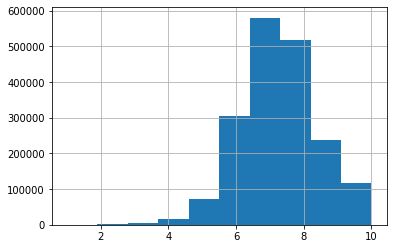

In [17]:
ratings['rating'].hist()

#### Amount of entries of various games

In [0]:
pd.value_counts(ratings["gameid"]) #length is number of unique values

822       32766
13        31560
16          764
24770       756
39927       752
          ...  
160094       17
261393       15
178835       10
298627       10
168230        5
Name: gameid, Length: 10510, dtype: int64

#### The ratings of the different games

In [0]:
ratings.sort_values(by = "gameid")

,gameid,username,rating
1372188,2,javelin98,10.00
544395,2,BloodyJack,7.00
544396,2,potterama,7.00
544397,2,Dorque,7.00
544398,2,StormKnight,7.00
...,...,...,...
119520,299121,Blackfire0,8.00
119519,299121,Jokerman,8.00
119518,299121,Rayman1971,8.25
119516,299121,theozz,9.00


#### The amount of entries for various users

In [0]:
pd.value_counts(ratings["username"]) # is the number of unique values

Doel               3104
Walt Mulder        2631
RichardIngram      1865
Tolkana            1807
TomVasel           1795
                   ... 
marrog               10
Litespeed Rider      10
Wanderer12           10
pearmanb             10
seanow               10
Name: username, Length: 52630, dtype: int64

#### The amount of rating for different users

In [0]:
pd.value_counts(ratings["rating"])

7.00000     479434
8.00000     400625
6.00000     278671
9.00000     181279
10.00000     99797
             ...  
7.14174          1
6.71111          1
8.06500          1
8.30160          1
7.01447          1
Name: rating, Length: 3673, dtype: int64

## SVD experiments

#### Initializing Reader

In [14]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[[ 'gameid', 'username', 'rating']], reader)

#### Launch SVD train and predict and visualize results

In [0]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25)
# Train the algorithm on the trainset, and predict ratings for the testset
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

In [25]:
import random
for elem in random.sample(predictions, 50):
  print(f'User {elem.uid} - {elem.iid}, ground true: {elem.r_ui}, predicted: {elem.est} ')

User 2539 - keithrapley, ground true: 9.0, predicted: 7.756651108280522 
User 153497 - cherecche, ground true: 6.6, predicted: 6.425169982989881 
User 156062 - babelt, ground true: 7.0, predicted: 6.230151630178607 
User 94732 - Hiru87, ground true: 6.0, predicted: 6.45190953998036 
User 245473 - LizardSoldier, ground true: 8.2, predicted: 8.53218183003005 
User 124965 - savantt, ground true: 8.5, predicted: 7.857500693168237 
User 189160 - kyle_the_white, ground true: 7.0, predicted: 7.4062890310128315 
User 651 - tera, ground true: 7.0, predicted: 7.0173195274698905 
User 5554 - 4apaev, ground true: 6.0, predicted: 6.09207869381939 
User 19508 - Purri, ground true: 7.0, predicted: 6.469070560193746 
User 18946 - frank_avocado, ground true: 6.0, predicted: 6.682913106676345 
User 236781 - HouseOfPanda, ground true: 9.0, predicted: 8.789708708832013 
User 189222 - Lox013, ground true: 7.1, predicted: 7.525937948884324 
User 218547 - listersantos, ground true: 8.0, predicted: 8.15484917

### Experiments (can be launched)

#### List of all system users

In [0]:
users = list(set(list(ratings["username"])))

#### Predict rating for n random users

In [0]:
n = 10

In [41]:
import random
for i in range(n):
  a = algo.predict(i, random.sample(users, 1)[0])
  print(f"User: {a.iid}, predicted_rating: {a.est}")

User: forlorn110, predicted_rating: 7.401810723524485
User: Goton, predicted_rating: 7.635270921696519
User: bravereguard, predicted_rating: 7.049602184200462
User: provence, predicted_rating: 7.041841821595072
User: blackwolf2015, predicted_rating: 7.236919798201963
User: Ray Freeman, predicted_rating: 7.690385530085239
User: enderhuntiii, predicted_rating: 6.960921887013244
User: tomatosoupcan, predicted_rating: 7.211170401198862
User: malvitz, predicted_rating: 7.365754579606477
User: jtimmerman, predicted_rating: 7.19949852608117


### Launching 5-fold cross validation, with different params. 
!!!! Warning - it make take about 15 minutes to run one cell, but the results visualization are below

In [0]:
algo = SVD()
validation_SVD = cross_validate(algo, data, measures=['RMSE','MSE', 'MAE'], cv=5, verbose=True)

In [0]:
algo = SVD(biased = False)
validation_SVD_probabilistic = cross_validate(algo, data, measures=['RMSE', 'MSE', 'MAE'], cv=5, verbose=True)

#### Visualization

##### SVD ordinary

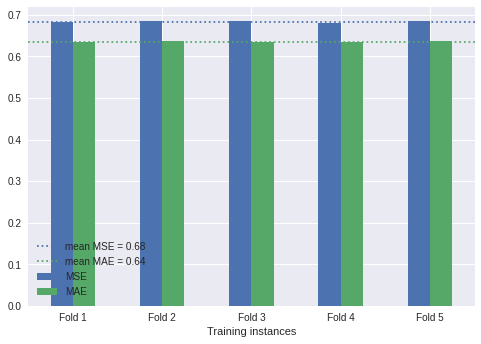

In [0]:
plt.style.use('seaborn')
df = pd.DataFrame({'Training instances':['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
                   'MAE': validation_SVD.get('test_mae'),
                   'MSE':validation_SVD.get('test_mse')
                   })

ax = df.plot.bar(x='Training instances', y={'MSE', 'MAE'}, rot=0)

ax.axhline(np.mean(validation_SVD.get('test_mse')), xmin = 0, xmax = 1,  ls = ':')
ax.axhline(np.mean(validation_SVD.get('test_mae')),  xmin = 0, xmax = 1, ls = ':',   c = 'C1')
plt.legend(("mean MSE = {:.2}".format(np.mean(validation_SVD.get('test_mse'))),
            "mean MAE = {:.2}".format(np.mean(validation_SVD.get('test_mae'))) ,
            "MSE", "MAE"), loc='lower left', frameon=False)
plt.savefig('drive/My Drive/Thesis/SVD_new.png')
# plt.show()

##### SVD probabilistic (PMF)

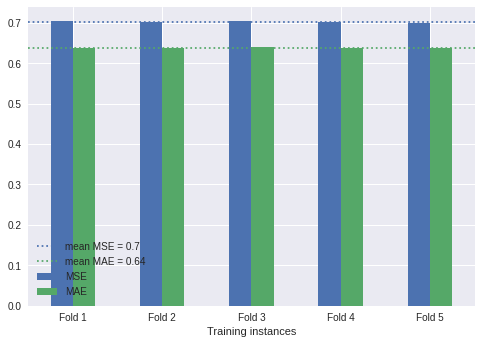

In [0]:
plt.style.use('seaborn')
df = pd.DataFrame({'Training instances':['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
                   'MAE': validation_SVD_probabilistic.get('test_mae'),
                   'MSE':validation_SVD_probabilistic.get('test_mse')
                   })

ax = df.plot.bar(x='Training instances', y={'MSE', 'MAE'}, rot=0)

ax.axhline(np.mean(validation_SVD_probabilistic.get('test_mse')), xmin = 0, xmax = 1,  ls = ':')
ax.axhline(np.mean(validation_SVD_probabilistic.get('test_mae')),  xmin = 0, xmax = 1, ls = ':',   c = 'C1')
plt.legend(("mean MSE = {:.2}".format(np.mean(validation_SVD_probabilistic.get('test_mse'))),
            "mean MAE = {:.2}".format(np.mean(validation_SVD_probabilistic.get('test_mae'))) ,
            "MSE", "MAE"), loc='lower left', frameon=False)
plt.savefig('drive/My Drive/Thesis/SVD_probabilistic_new.png')
# plt.show()

## KNN experiments

In [0]:
from surprise import KNNBasic

#### Launch KNNBasic train and predict and visualize results

In [49]:
algo = KNNBasic()
algo.fit(trainset)
predictions = algo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


Random prediction on test

In [50]:
import random
for elem in random.sample(predictions, 50):
  print(f'User {elem.uid} - {elem.iid}, ground true: {elem.r_ui}, predicted: {elem.est} ')

User 2348 - Doomfarer, ground true: 6.0, predicted: 6.449528683275311 
User 31380 - Pascal67, ground true: 7.15, predicted: 6.224911933375618 
User 225977 - smoox, ground true: 7.5, predicted: 7.41408981488351 
User 189950 - danielvinzia, ground true: 10.0, predicted: 9.36181606357176 
User 67917 - Doel, ground true: 9.0, predicted: 7.925 
User 203464 - lsy03, ground true: 7.0, predicted: 7.24396489314062 
User 38845 - Flashhawk, ground true: 6.0, predicted: 6.892942662589715 
User 1143 - kingsleypark, ground true: 7.0, predicted: 8.281279370401787 
User 137480 - zuzusdad, ground true: 7.0, predicted: 7.909840306887563 
User 242653 - profnuton, ground true: 9.0, predicted: 7.869034414576598 
User 192297 - TomVasel, ground true: 8.0, predicted: 7.025 
User 23964 - The Gamester, ground true: 7.0, predicted: 6.087230489493969 
User 539 - woodoo03, ground true: 7.0, predicted: 7.162150768061449 
User 201305 - Chez Geeks, ground true: 8.0, predicted: 7.201795519197219 
User 66798 - Asinda, 

### Experiments (can be launched)

list of all users

In [0]:
users = list(set(list(ratings["username"])))
n = 10

preidction for random n users

In [48]:
import random
for i in range(n):
  a = algo.predict(i, random.sample(users, 1)[0])
  print(f"User: {a.iid}, predicted_rating: {a.est}")

User: k776, predicted_rating: 7.370733844814215
User: cortn, predicted_rating: 7.370733844814215
User: EricCartman87, predicted_rating: 6.4030492900472575
User: azrael0, predicted_rating: 7.370733844814215
User: krhayden, predicted_rating: 7.816897037712658
User: Wimpgod, predicted_rating: 7.370733844814215
User: Eawyne, predicted_rating: 7.370733844814215
User: Killjoy, predicted_rating: 7.370733844814215
User: Gallo22, predicted_rating: 7.6614077619299605
User: markopolo310, predicted_rating: 7.370733844814215


### Cross validation on KNN. 
!!!! Warning - it make take about 15 minutes to run one cell, but the results visualization are below

In [0]:
validation_sinus = cross_validate(algo, data, measures=['RMSE','MSE', 'MAE'], cv=5, verbose=True)

In [0]:
sim_options = {'name': 'pearson_baseline'}
algo = KNNBasic(sim_options = sim_options)

# Run 5-fold cross-validation and print results
validation_pearson = cross_validate(algo, data, measures=['RMSE','MSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0099  1.0099  1.0122  1.0100  1.0094  1.0103  0.0010  
MSE (testset)     1.0200  1.0199  1.0246  1.0200  1.0189  1.0207  0.0020  
MAE (testset)     0.7411  0.7421  0.7433  0.7408  0.7416  0.7418  0.0009  
Fit time          47.54   48.51   48.85   48.51   4

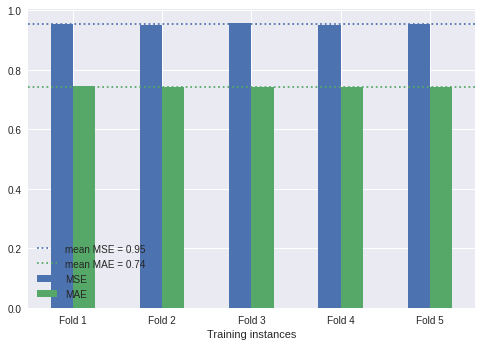

In [0]:
plt.style.use('seaborn')
df = pd.DataFrame({'Training instances':['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
                   'MAE': validation_sinus.get('test_mae'),
                   'MSE':validation_sinus.get('test_mse'),

                   })

ax = df.plot.bar(x='Training instances', y={'MSE', 'MAE'}, rot=0)

ax.axhline(np.mean(validation_sinus.get('test_mse')), xmin = 0, xmax = 1,  ls = ':')
ax.axhline(np.mean(validation_sinus.get('test_mae')),  xmin = 0, xmax = 1, ls = ':',   c = 'C1')
plt.legend(("mean MSE = {:.2}".format(np.mean(validation_sinus.get('test_mse'))),
            "mean MAE = {:.2}".format(np.mean(validation_sinus.get('test_mae'))) ,
            "MSE", "MAE"), loc='lower left', frameon=False)
plt.savefig('drive/My Drive/Thesis/KNNBasic_sinus_2m.png')
# plt.show()

In [0]:
import matplotlib.pyplot as plt

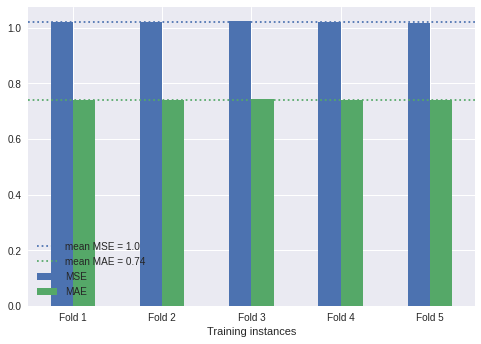

In [0]:
plt.style.use('seaborn')
df = pd.DataFrame({'Training instances':['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
                   'MAE': validation_pearson.get('test_mae'),
                   'MSE':validation_pearson.get('test_mse')
                   })

ax = df.plot.bar(x='Training instances', y={'MSE', 'MAE'}, rot=0)

ax.axhline(np.mean(validation_pearson.get('test_mse')), xmin = 0, xmax = 1,  ls = ':')
ax.axhline(np.mean(validation_pearson.get('test_mae')),  xmin = 0, xmax = 1, ls = ':',   c = 'C1')
plt.legend(("mean MSE = {:.2}".format(np.mean(validation_pearson.get('test_mse'))),
            "mean MAE = {:.2}".format(np.mean(validation_pearson.get('test_mae'))) ,
            "MSE", "MAE"), loc='lower left', frameon=False)
plt.savefig('drive/My Drive/Thesis/KNNBasic_Pearson_new.png')
# plt.show()

### Cross validation among SVD and KNN

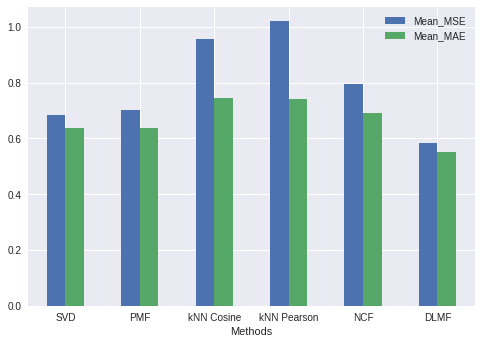

In [0]:
plt.style.use('seaborn')
df = pd.DataFrame({'Methods':['SVD', 'PMF', 'kNN Cosine', 'kNN Pearson', 'NCF', 'DLMF'],
                   'Mean_MSE': [np.mean(validation_SVD.get('test_mse')),
                                 np.mean(validation_SVD_probabilistic.get('test_mse')),
                                 np.mean(validation_sinus.get('test_mse')),
                                 np.mean(validation_pearson.get('test_mse')),
                                 0.7968,
                                 0.5839],
                   'Mean_MAE':  [np.mean(validation_SVD.get('test_mae')),
                                 np.mean(validation_SVD_probabilistic.get('test_mae')),
                                 np.mean(validation_sinus.get('test_mae')),
                                 np.mean(validation_pearson.get('test_mae')),
                                 0.6899,
                                 0.5521]

                   })

ax = df.plot.bar(x='Methods', y={'Mean_MSE', 'Mean_MAE'}, rot=0)
# plt.savefig('drive/My Drive/Thesis/comparison_new.png')
plt.show()